In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

df = pd.read_csv("/content/drive/MyDrive/PRAKTIKUM ML/Praktikum07/Data/apples_and_oranges.csv")
df.head()

,Weight,Size,Class
0,69,4.39,orange
1,69,4.21,orange
2,65,4.09,orange
3,72,5.85,apple
4,67,4.70,orange


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Weight  40 non-null     int64  
 1   Size    40 non-null     float64
 2   Class   40 non-null     object 
dtypes: float64(1), int64(1), object(1)
memory usage: 1.1+ KB


In [6]:
df.describe()

,Weight,Size
count,40.000000,40.000000
mean,70.200000,4.922750
std,3.039906,0.590063
min,65.000000,4.010000
25%,68.000000,4.360000
50%,70.000000,4.930000
75%,73.000000,5.472500
max,75.000000,5.850000


In [7]:
# Asumsi: kolom terakhir adalah label (target)
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Jika label masih berupa teks, ubah ke angka
if y.dtype == 'object':
    le = LabelEncoder()
    y = le.fit_transform(y)
    print("\n🔹 Label yang digunakan:", list(le.classes_))



🔹 Label yang digunakan: ['apple', 'orange']


In [8]:
# Standarisasi fitur agar seimbang
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Bagi data jadi train (80%) dan test (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

print("🔹 Jumlah data train:", len(X_train))
print("🔹 Jumlah data test :", len(X_test))


🔹 Jumlah data train: 32
🔹 Jumlah data test : 8


In [9]:
# Buat model Support Vector Machine
model = SVC(kernel='rbf', C=1, gamma='scale')

# Latih model menggunakan data training
model.fit(X_train, y_train)

print("✅ Model SVM berhasil dilatih!")


✅ Model SVM berhasil dilatih!


In [10]:
# Prediksi data test
y_pred = model.predict(X_test)

# Evaluasi performa model
akurasi = accuracy_score(y_test, y_pred)
print(f"🔹 Akurasi model: {akurasi * 100:.2f}%")

print("\n🔹 Classification Report:")
print(classification_report(y_test, y_pred))


🔹 Akurasi model: 100.00%

🔹 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         5

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8



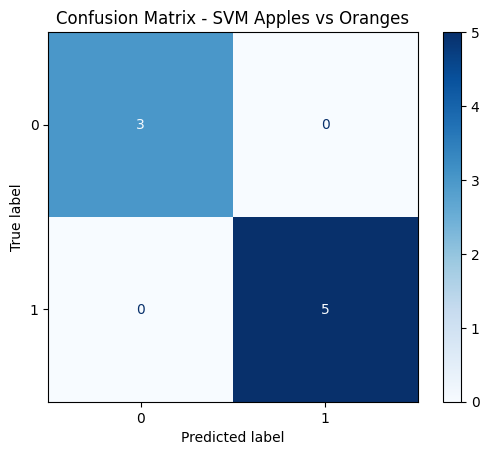

In [11]:
# Tampilkan confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - SVM Apples vs Oranges")
plt.show()


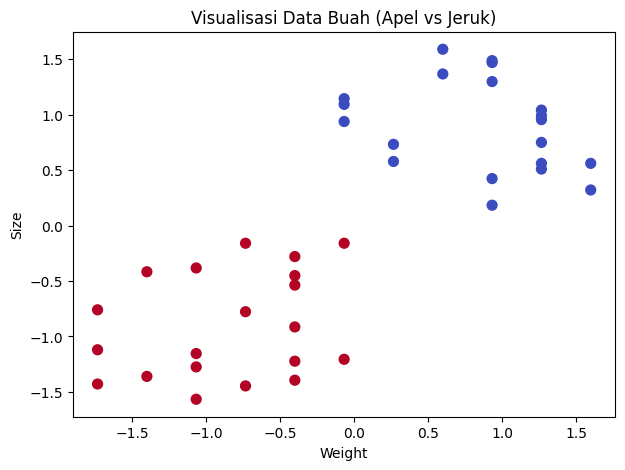

In [12]:
# Visualisasi hanya jika dataset punya 2 fitur
if X.shape[1] == 2:
    plt.figure(figsize=(7,5))
    plt.scatter(X_scaled[:,0], X_scaled[:,1], c=y, cmap='coolwarm', s=50)
    plt.title("Visualisasi Data Buah (Apel vs Jeruk)")
    plt.xlabel(df.columns[0])
    plt.ylabel(df.columns[1])
    plt.show()
else:
    print("Dataset memiliki lebih dari 2 fitur, visualisasi 2D dilewati.")
